In [1]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

Using Theano backend.


In [2]:
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
    ])
# model.add(l4) Can also add layers like this.

## Note, Dense is suggesting each layer, this is a 3 layer network

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [5]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

In [6]:
train_labels = []
train_samples = []

In [7]:
for i in range(50):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [8]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))

/Users/davescott/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
model.fit(scaled_train_samples, train_labels, batch_size=10, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
 - 0s - loss: 0.6932 - acc: 0.5995
Epoch 2/20
 - 0s - loss: 0.6725 - acc: 0.7452
Epoch 3/20


/Users/davescott/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 - 0s - loss: 0.6480 - acc: 0.7986
Epoch 4/20
 - 0s - loss: 0.6188 - acc: 0.8290
Epoch 5/20
 - 0s - loss: 0.5851 - acc: 0.8324
Epoch 6/20
 - 0s - loss: 0.5453 - acc: 0.8452
Epoch 7/20
 - 0s - loss: 0.4986 - acc: 0.8433
Epoch 8/20
 - 0s - loss: 0.4415 - acc: 0.8771
Epoch 9/20
 - 0s - loss: 0.3839 - acc: 0.9110
Epoch 10/20
 - 0s - loss: 0.3490 - acc: 0.9205
Epoch 11/20
 - 0s - loss: 0.3279 - acc: 0.9205
Epoch 12/20
 - 0s - loss: 0.3135 - acc: 0.9243
Epoch 13/20
 - 0s - loss: 0.3029 - acc: 0.9205
Epoch 14/20
 - 0s - loss: 0.2954 - acc: 0.9257
Epoch 15/20
 - 0s - loss: 0.2895 - acc: 0.9243
Epoch 16/20
 - 0s - loss: 0.2848 - acc: 0.9262
Epoch 17/20
 - 0s - loss: 0.2811 - acc: 0.9281
Epoch 18/20
 - 0s - loss: 0.2780 - acc: 0.9276
Epoch 19/20
 - 0s - loss: 0.2755 - acc: 0.9305
Epoch 20/20
 - 0s - loss: 0.2735 - acc: 0.9276


# 20 Epochs gives an accuracy of over 93% fit for the model. #notbad

In [11]:
model.fit(scaled_train_samples, train_labels, validation_split=0.1, batch_size=10, epochs=20, shuffle=True, verbose=2)

Train on 1890 samples, validate on 210 samples
Epoch 1/20
 - 0s - loss: 0.2834 - acc: 0.9280 - val_loss: 0.1642 - val_acc: 0.9619
Epoch 2/20
 - 0s - loss: 0.2825 - acc: 0.9222 - val_loss: 0.1615 - val_acc: 0.9857
Epoch 3/20
 - 0s - loss: 0.2813 - acc: 0.9270 - val_loss: 0.1590 - val_acc: 0.9857
Epoch 4/20


/Users/davescott/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 - 0s - loss: 0.2803 - acc: 0.9286 - val_loss: 0.1576 - val_acc: 0.9619
Epoch 5/20
 - 0s - loss: 0.2796 - acc: 0.9249 - val_loss: 0.1550 - val_acc: 0.9857
Epoch 6/20
 - 0s - loss: 0.2786 - acc: 0.9275 - val_loss: 0.1529 - val_acc: 0.9857
Epoch 7/20
 - 0s - loss: 0.2777 - acc: 0.9302 - val_loss: 0.1516 - val_acc: 0.9857
Epoch 8/20
 - 0s - loss: 0.2771 - acc: 0.9291 - val_loss: 0.1498 - val_acc: 0.9619
Epoch 9/20
 - 0s - loss: 0.2761 - acc: 0.9243 - val_loss: 0.1483 - val_acc: 0.9857
Epoch 10/20
 - 0s - loss: 0.2755 - acc: 0.9296 - val_loss: 0.1472 - val_acc: 0.9857
Epoch 11/20
 - 0s - loss: 0.2747 - acc: 0.9302 - val_loss: 0.1458 - val_acc: 0.9857
Epoch 12/20
 - 0s - loss: 0.2741 - acc: 0.9302 - val_loss: 0.1441 - val_acc: 0.9857
Epoch 13/20
 - 0s - loss: 0.2735 - acc: 0.9296 - val_loss: 0.1435 - val_acc: 0.9857
Epoch 14/20
 - 0s - loss: 0.2729 - acc: 0.9302 - val_loss: 0.1425 - val_acc: 0.9857
Epoch 15/20
 - 0s - loss: 0.2724 - acc: 0.9302 - val_loss: 0.1413 - val_acc: 0.9857
Epoch 16/

## Model is generalizing well on the validation data. Not overfitting.

In [12]:
test_labels = []
test_samples = []

In [13]:
for i in range(10):
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(200):
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [14]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

In [15]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform((test_samples).reshape(-1,1))

/Users/davescott/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [16]:
predictions = model.predict(scaled_test_samples, batch_size=10, verbose=0)

In [17]:
for i in predictions:
    print(i)

[0.77896875 0.22103123]
[0.0463391 0.9536609]
[0.77896875 0.22103123]
[0.06325115 0.93674886]
[0.9689727 0.0310273]
[0.36498034 0.63501966]
[0.88470554 0.11529446]
[0.09472545 0.90527457]
[0.9820538  0.01794618]
[0.20131092 0.79868907]
[0.9212252  0.07877481]
[0.06609391 0.9339061 ]
[0.6071525 0.3928475]
[0.17610212 0.8238979 ]
[0.97362655 0.02637342]
[0.3276851 0.6723149]
[0.96132535 0.03867467]
[0.05298462 0.9470154 ]
[0.9021839  0.09781612]
[0.03699284 0.96300715]
[0.96352834 0.03647165]
[0.04049143 0.9595086 ]
[0.8305303  0.16946971]
[0.08084884 0.9191512 ]
[0.9153086  0.08469139]
[0.13322896 0.86677104]
[0.52638406 0.47361597]
[0.03699284 0.96300715]
[0.9021839  0.09781612]
[0.04235755 0.95764244]
[0.8941662  0.10583382]
[0.10277015 0.89722985]
[0.682456 0.317544]
[0.06325115 0.93674886]
[0.444211 0.555789]
[0.07213856 0.92786145]
[0.8524883  0.14751174]
[0.03084805 0.969152  ]
[0.9267615  0.07323851]
[0.03084805 0.969152  ]
[0.96543825 0.03456177]
[0.03699284 0.96300715]
[0.90899

In [18]:
rounded_predictions = model.predict_classes(scaled_test_samples, batch_size=10, verbose=0)

In [19]:
for i in rounded_predictions:
    print(i)

0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


## We can see these predictions with either a binary or a decimal without roundoff

# Confusion Matrix

In [20]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [21]:
cm = confusion_matrix(test_labels, rounded_predictions)

In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[189  21]
 [ 10 200]]


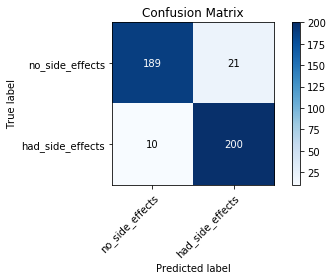

In [23]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm, cm_plot_labels, title="Confusion Matrix")

# Confusion matrices are a nice way to quickly see how our model is doing on data it hasn't seen before.

# Saving and loading models

# 1. model.save()

In [24]:
model.save('medical_trial_model.hS')

## The save function saves:

### .  The architecture of the model
### . The weights of the model
### . The training configuration(loss, optimizer)
### . The state of the optimizer, allowing to resume 
 

In [25]:
from keras.models import load_model
new_model = load_model('medical_trial_model.hS')

In [26]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [32]:
new_model.get_weights()

[array([[-0.3344439 ,  0.32749036,  0.26193646, -0.28967062, -0.4204343 ,
         -0.432962  , -0.3455889 ,  0.2620321 , -0.3514745 , -0.10505974,
          0.3349751 , -0.39217865,  0.4146039 , -0.2246217 , -0.18670923,
          0.5052649 ]], dtype=float32),
 array([-0.00051256, -0.02262442, -0.02797438, -0.00051285, -0.00051259,
        -0.00051286,  0.26429725,  0.09801745,  0.26943305, -0.00051263,
        -0.0825032 , -0.00051277, -0.1165777 ,  0.17340027, -0.00027966,
        -0.07604203], dtype=float32),
 array([[ 1.53025836e-01, -1.48926944e-01,  5.24124205e-02,
          3.33151132e-01, -2.73185015e-01, -8.11090469e-02,
         -2.47800738e-01,  2.28123039e-01, -2.68269718e-01,
         -3.13172638e-02,  2.68065602e-01, -1.39232725e-01,
         -8.09081197e-02, -8.80455971e-02, -9.90383625e-02,
          1.77702695e-01, -2.47203290e-01,  9.60749090e-02,
         -2.22597733e-01, -7.68622458e-02, -7.31464326e-02,
         -2.69325376e-02,  2.79128879e-01, -1.23029202e-01,
 

In [33]:
new_model.optimizer

# 2. model.to_json()

#### This is only saving the architecture of the model. No weights or training configuration will be saved.

In [34]:
#save as JSOW
json_string = model.to_json()

# save as YAML
# yaml_string = model.to_yaml()

In [35]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_2", "trainable": true, "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": 

### Model reconstruction from JSON:

In [36]:
from keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [37]:
model_architecture.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


# 3. model.save_weights()

#### If you only want the weights, you can save it as the following

In [38]:
model.save_weights('my_model_weights.hS')

In [39]:
model2 = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
    ])

In [40]:
model2.load_weights('my_model_weights.hS')